# Heart Disease Prediction
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "target" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 1.

## Importing dependencies
We import a few dependencies like numpy, pandas, matplotlib, seaborn.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix

## Loading our dataset
We load the dataset from the dataset.csv file. We load our dataset into a Pandas DataFrame object.

In [3]:
df = pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")

## Describing our dataset
We display the first 10 entries of the DataFrame object and display the summary of the dataset.

In [4]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Counting null values

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
features = [x for x in df.columns if x != 'target']

## Finding relation between the target and features
We plot different graphs to see how the target feature vary with different features.

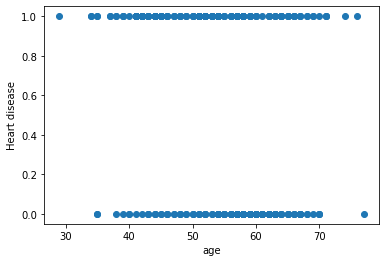

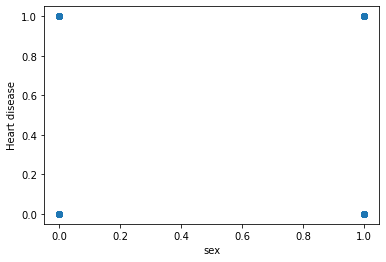

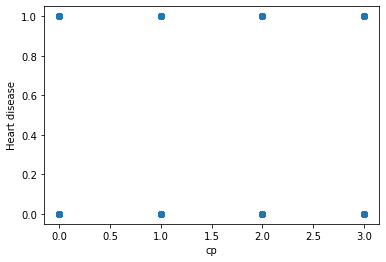

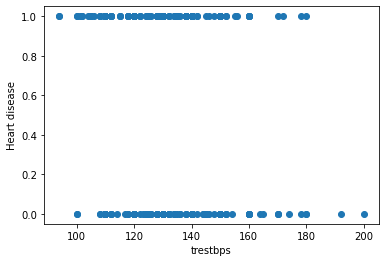

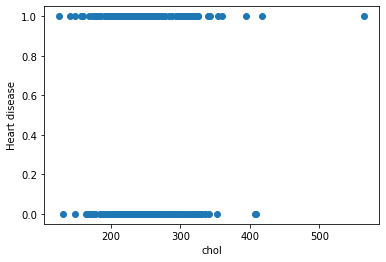

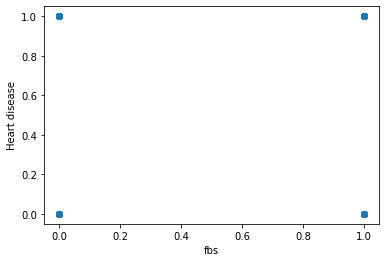

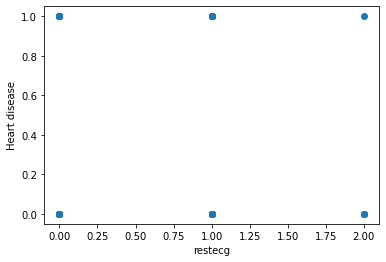

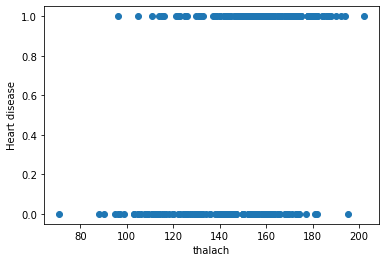

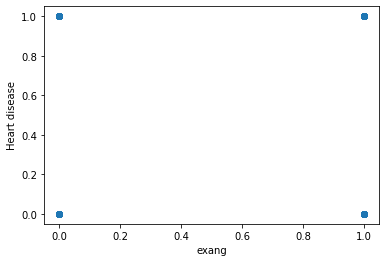

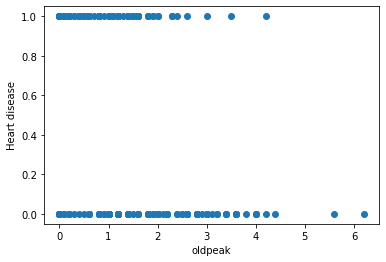

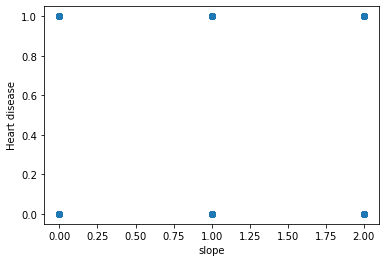

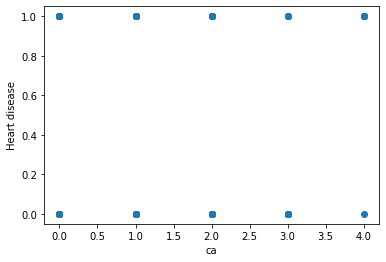

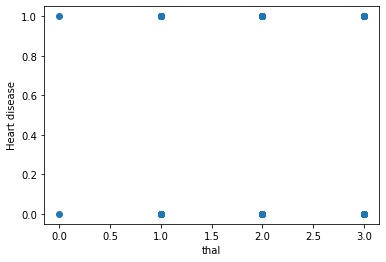

In [8]:
y = df['target']
for i in features:
  x = df[i]
  plt.xlabel(i)
  plt.ylabel("Heart disease")
  plt.scatter(x, y)
  plt.show()

## Using heatmaps
Graphs can give a pretty fair picture about the relationship between the targetted data and the feature. But using a heatmap shows a more accurate picture about the correlation between different features and the target variable.

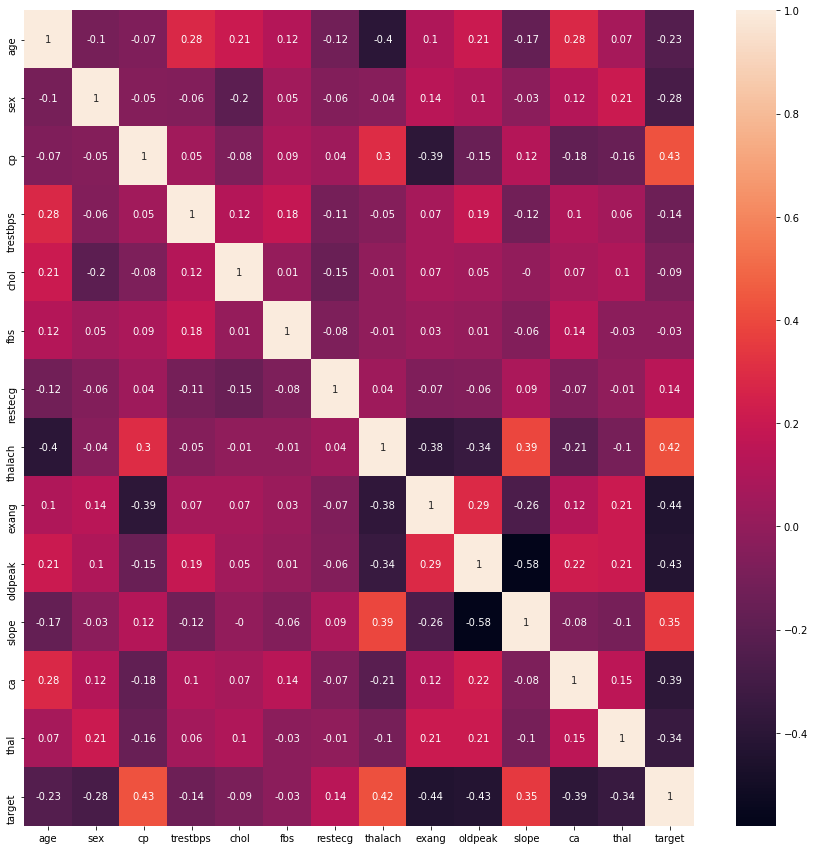

In [9]:
plt.figure(figsize=(15, 15))
corr_mat = df.corr().round(2)
sns.heatmap(data=corr_mat, annot=True)

## Selecting features having good corelation factor
We select those features which have a good correlation factor with the target variable

In [10]:
selected_features = ['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

## Conclusion from Graphs and Heatmaps
We shape our X and Y variables according to the selected features and target variable.

In [11]:
X = df[selected_features]
Y = df['target']

## Splitting the dataset
We use train_test_split to test our dataset into training and testing variables.

In [12]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=4)

## Calculating TF, TN, FP, FN
Writing a function to manually calculate the True Positives, False Positives, True Negatives and False Negatives.

In [13]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

## Training a KNN Model
We try training a KNN Model for our dataset.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
scores = []
for i in range(1, 18):
  knnModel = KNeighborsClassifier(n_neighbors=i)
  knnModel.fit(X_train, Y_train)
  score = knnModel.score(x_test, y_test)
  scores.append(score)
max(scores)

0.75

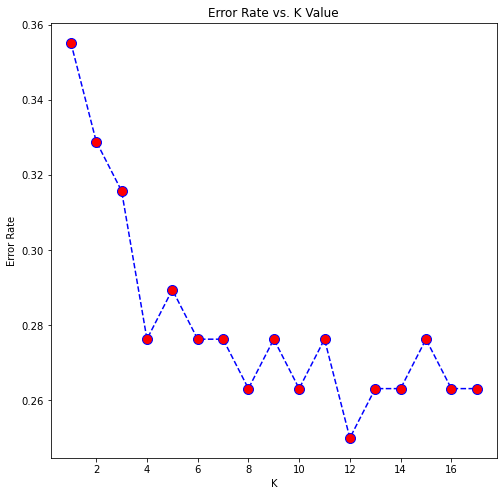

In [15]:
errors = [(1 - x) for x in scores]
plt.figure(figsize=(8, 8))
plt.plot(range(1, 18), errors, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value') 
plt.xlabel('K') 
plt.ylabel('Error Rate')
plt.show()

In [16]:
knnModel = KNeighborsClassifier(n_neighbors=12)
knnModel.fit(X_train, Y_train)
knnModel.score(x_test, y_test)

0.75

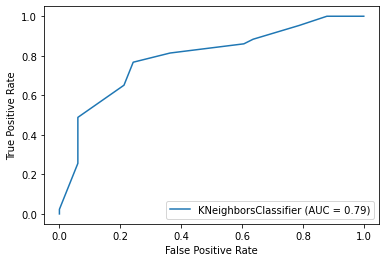

In [17]:
plot_roc_curve(knnModel, x_test, y_test)

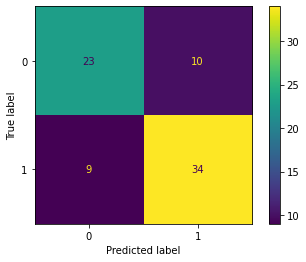

In [18]:
plot_confusion_matrix(knnModel, x_test, y_test)

In [19]:
y_knn_hat = knnModel.predict(x_test)

In [20]:
truePositive, falsePositive, trueNegative, falseNegative = perf_measure(np.asarray(y_test), np.asarray(y_knn_hat))
print("Precision is", (truePositive / (truePositive + falsePositive)))
print("Recall is", (truePositive / (truePositive + falseNegative)))
print("Specificity is", (trueNegative / (trueNegative + falsePositive)))
print("Accuracy is", ((truePositive + trueNegative) / (truePositive + falsePositive + falseNegative + trueNegative)))

Precision is 0.7727272727272727
Recall is 0.7906976744186046
Specificity is 0.696969696969697
Accuracy is 0.75


## Training a Logistic Regression Model
We try training a Logistic Regression Model for our dataset.

In [21]:
from sklearn.linear_model import LogisticRegression
lrModel = LogisticRegression(max_iter=1200)
lrModel.fit(X_train, Y_train)
lrModel.score(x_test, y_test)

0.8026315789473685

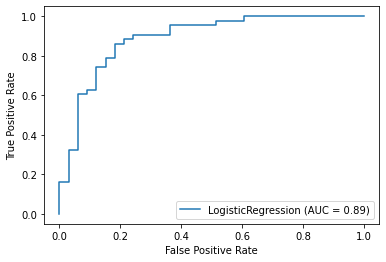

In [22]:
plot_roc_curve(lrModel, x_test, y_test)

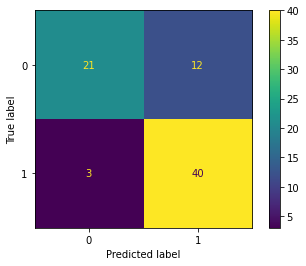

In [23]:
plot_confusion_matrix(lrModel, x_test, y_test)

In [24]:
y_lr_hat = lrModel.predict(x_test)

In [25]:
truePositive, falsePositive, trueNegative, falseNegative = perf_measure(np.asarray(y_test), np.asarray(y_lr_hat))
print("Precision is", (truePositive / (truePositive + falsePositive)))
print("Recall is", (truePositive / (truePositive + falseNegative)))
print("Specificity is", (trueNegative / (trueNegative + falsePositive)))
print("Accuracy is", ((truePositive + trueNegative) / (truePositive + falsePositive + falseNegative + trueNegative)))

Precision is 0.7692307692307693
Recall is 0.9302325581395349
Specificity is 0.6363636363636364
Accuracy is 0.8026315789473685


We see that Logistic Regression and KNN at best offer an accuracy of 80%. Let's try standard scaling our X variable and then training a KNN Model and Logistic Regression Model.

## Standard Scaling
We standard scale our X variable and try to use that to increase the efficiency of our models.

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for i in selected_features:
  X[i] = scaler.fit_transform(np.asarray(X[i]).reshape(-1, 1))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

## Splitting our dataset
We split our dataset into training and testing variables.

In [27]:
scaled_x_train, scaled_x_test, scaled_y_train, scaled_y_test = train_test_split(X, Y, random_state=4, test_size=0.3)

## Training a Logistic Regression Model
We try training a new Logistic Regression model using the new scaled values.

In [28]:
newLrModel = LogisticRegression()
newLrModel.fit(scaled_x_train, scaled_y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
newLrModel.score(scaled_x_test, scaled_y_test)

0.7802197802197802

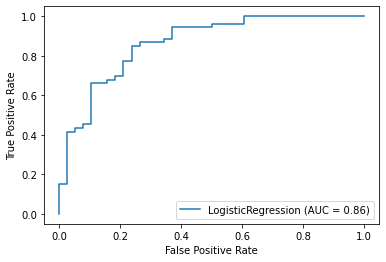

In [30]:
plot_roc_curve(newLrModel, scaled_x_test, scaled_y_test)

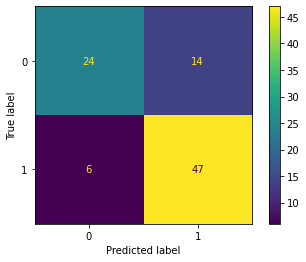

In [31]:
plot_confusion_matrix(newLrModel, scaled_x_test, scaled_y_test)

In [32]:
y_new_lr_hat = newLrModel.predict(scaled_x_test)

In [33]:
truePositive, falsePositive, trueNegative, falseNegative = perf_measure(np.asarray(scaled_y_test), np.asarray(y_new_lr_hat))
print("Precision is", (truePositive / (truePositive + falsePositive)))
print("Recall is", (truePositive / (truePositive + falseNegative)))
print("Specificity is", (trueNegative / (trueNegative + falsePositive)))
print("Accuracy is", ((truePositive + trueNegative) / (truePositive + falsePositive + falseNegative + trueNegative)))

Precision is 0.7704918032786885
Recall is 0.8867924528301887
Specificity is 0.631578947368421
Accuracy is 0.7802197802197802


Our Logistic Regression model fares with a score of 0.78

## Training a KNN Model
We try training a new KNN Model using the newly scaled values.

In [34]:
scores = []
for i in range(1, 8):
  newKnnModel = KNeighborsClassifier(n_neighbors=i)
  newKnnModel.fit(scaled_x_train, scaled_y_train)
  score = newKnnModel.score(scaled_x_test, scaled_y_test)
  scores.append(score)

max(scores)

0.8791208791208791

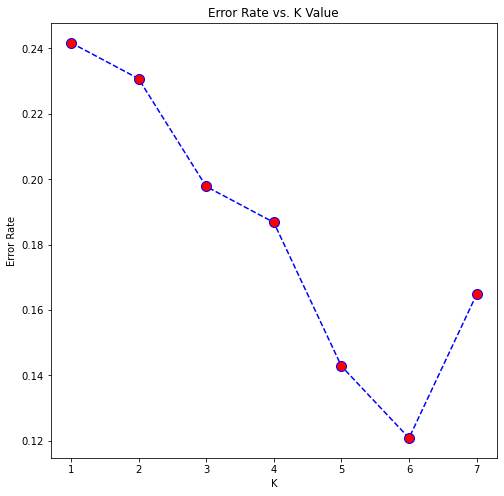

In [35]:
errors = [(1 - x) for x in scores]
plt.figure(figsize=(8, 8))
plt.plot(range(1, 8), errors, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value') 
plt.xlabel('K') 
plt.ylabel('Error Rate')
plt.show()

In [36]:
newKnnModel = KNeighborsClassifier(n_neighbors=6)
newKnnModel.fit(scaled_x_train, scaled_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

Making predictions on scaled test set

In [37]:
y_new_knn_hat = newKnnModel.predict(scaled_x_test)

In [38]:
newKnnModel.score(scaled_x_test, scaled_y_test)

0.8791208791208791

Plotting a roc curve and confusion matrix for the same

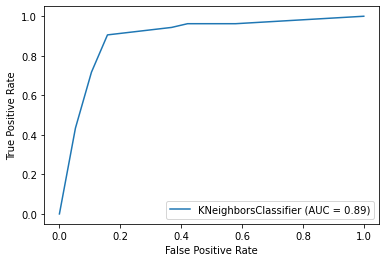

In [39]:
plot_roc_curve(newKnnModel, scaled_x_test, scaled_y_test)

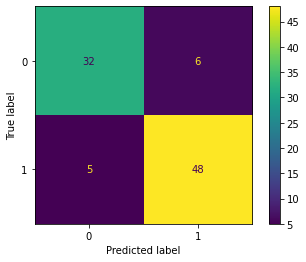

In [40]:
plot_confusion_matrix(newKnnModel, scaled_x_test, scaled_y_test)

In [41]:
truePositive, falsePositive, trueNegative, falseNegative = perf_measure(np.asarray(scaled_y_test), np.asarray(y_new_knn_hat))
print("Precision is", (truePositive / (truePositive + falsePositive)))
print("Recall is", (truePositive / (truePositive + falseNegative)))
print("Specificity is", (trueNegative / (trueNegative + falsePositive)))
print("Accuracy is", ((truePositive + trueNegative) / (truePositive + falsePositive + falseNegative + trueNegative)))

Precision is 0.8888888888888888
Recall is 0.9056603773584906
Specificity is 0.8421052631578947
Accuracy is 0.8791208791208791


## Visualising the model's performance
We plot the actual data and predicted data for different selected features.

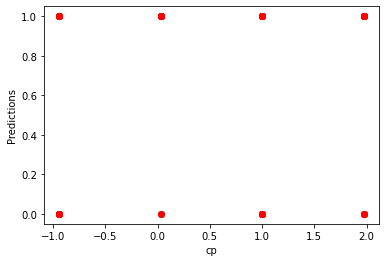

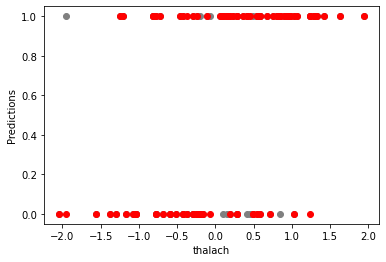

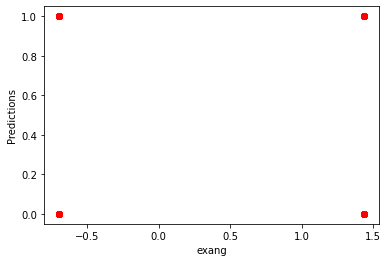

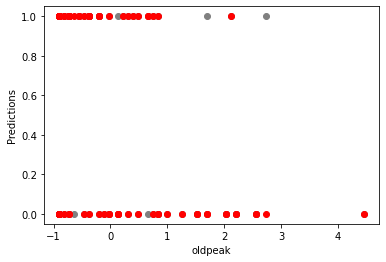

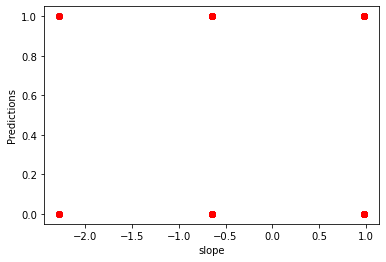

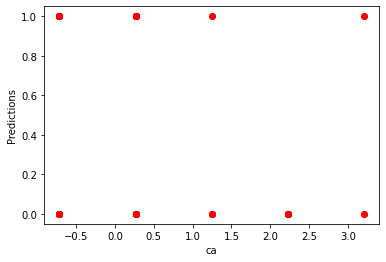

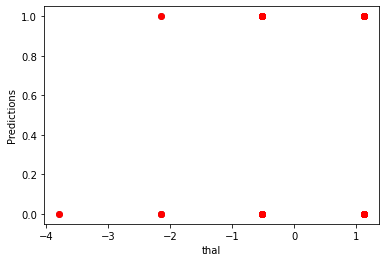

In [42]:
for i in selected_features:
  plt.scatter(scaled_x_test[i], scaled_y_test, color='grey')
  plt.scatter(scaled_x_test[i], y_new_knn_hat, color='red')
  plt.xlabel(i)
  plt.ylabel("Predictions")
  plt.show()

# Conclusion
Trained two different models, one using K Nearest Neighbors and Logistic Regression. Displayed the correlation between different features in the dataset using heatmaps and graphs. Also calculated the accuracy, specificity indicating the accuracy for both models. Also, visualised our predictions in the form of a confusion matrix and a ROC curve.

We were able to train a model with about 87% accuracy for our given dataset, thus making fair predictions for people who are more prone to heart diseases.